In [1]:
# Check the versions of libraries
 
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy 
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas 
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))
# numba
import numba
print('numba: {}'.format(numba.__version__))
# pyod
from pyod import version
print('pyod: {}'.format(version.__version__))

Python: 3.7.2 (default, Feb 21 2019, 17:35:59) [MSC v.1915 64 bit (AMD64)]
scipy: 1.2.1
numpy: 1.16.2
matplotlib: 3.0.3
pandas: 0.24.2
sklearn: 0.20.3
numba: 0.43.0
pyod: 0.6.8


In [2]:
# Load libraries
import numpy as np
from numpy.linalg import inv, det
import pandas as pd 

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA


import matplotlib.pyplot as plt
import numpy as np
import time
from tensorflow.python.keras.layers.core import Dense, Activation, Dropout
from tensorflow.python.keras.layers.recurrent import LSTM
from tensorflow.python.keras.models import Sequential
from numpy import arange, sin, pi, random

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle


#  USING ABOVE

from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn import metrics

import seaborn as sns
from sklearn.model_selection import train_test_split

import scipy.stats as stats


from pyod.models.knn import KNN   # kNN detector
from pyod.utils.utility import standardizer


from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.mcd import MCD
from pyod.models.ocsvm import OCSVM
from pyod.models.pca import PCA
from pyod.models.lscp import LSCP
from pyod.utils.utility import standardizer
from pyod.utils.utility import precision_n_scores

import warnings
#warnings.filterwarnings('once')
warnings.filterwarnings('ignore')

import os
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
#0 = all messages are logged (default behavior)
#1 = INFO messages are not printed
#2 = INFO and WARNING messages are not printed
#3 = INFO, WARNING, and ERROR messages are not printed

In [3]:
# Load dataset
dfs = pd.read_csv(r'FinalProcessing_out97.csv', header = 0)
#################################################
#scaler = MinMaxScaler(feature_range=(-1, 1))
#dfs = scaler.fit_transform(dfs)
################################################


#columns = np.full((corr.shape[0],), False, dtype=bool)
#corr = dfs.corr()
#selected_columns = dfs.columns[columns]
#columns[7] = True
#columns[0] = True
#columns[2] = True
#print(columns)
#print(selected_columns  )
#selected_columns = dfs.columns[columns]
#print(selected_columns  )
#dfs = dfs[selected_columns]
print("Number of observations:",len(dfs))
print("Number of normal transactions:",sum(dfs.cia==0))
print("Number of outliers:",sum(dfs.cia==1))
print("Ratio of outliers versus normal transaction:",sum(dfs.cia==1)/sum(dfs.cia==0))
dfs.head()

Number of observations: 2315
Number of normal transactions: 2075
Number of outliers: 240
Ratio of outliers versus normal transaction: 0.11566265060240964


,timestamp,cia,_exit,_llseek,accept4,bind,capset,clock_gettime,clone,close,...,socketpair,statfs64,tgkill,ugetrlimit,umount2,unlinkat,unshare,wait4,write,writev
0,1.553914e+09,0,0.0,0.0,0.0,0.0,0.0,14.0,10.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.553914e+09,0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.553914e+09,0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.553914e+09,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.553914e+09,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
y = dfs.cia.astype(float)
dfs = dfs.drop(columns = ["cia"])#@@@.astype(float)
dfs = dfs.drop(columns = ["timestamp"])#@@@.astype(float)

In [5]:
print(dfs.shape)
#print(dfs)

(2315, 95)


In [6]:
#################################################
#scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dfs = scaler.fit_transform(dfs)
################################################

In [7]:
from sklearn import preprocessing  
#Without type float gives a warning
x = dfs
#//CENTERING DATA
#x = preprocessing.scale(x, with_mean='True', with_std='False')

#y = dfs.cia#@@@.astype(float)
#print(y)
outliers_fraction = np.count_nonzero(y) / len(y)
outliers_percentage = round(outliers_fraction * 100, ndigits=4)

#print(outliers_fraction)
print("outliers_percentage: ",outliers_percentage,"%")


# Define nine outlier detection tools to be compared
#RandomState - train_test_split splits arrays or matrices into random train and test subsets. 
# That means that everytime you run it without specifying random_state, you will get a different result, this is expected behavior.
# On the other hand if you use random_state=some_number, then you can guarantee that the output of Run 1 will be equal to the output of Run 2,
random_state = np.random.RandomState(42)
print(x.shape)
print(y.shape)


# Spliting for training and testing data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5,  random_state=random_state)
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False, random_state=random_state)


######################################################
numpy.savetxt("X_test.csv", X_test, delimiter=",")
numpy.savetxt("X_train.csv", X_train, delimiter=",")
#######################################################


# standardizing data for processing
X_train, X_test = standardizer(X_train, X_test)

######################################################
numpy.savetxt("X_test2.csv", X_test, delimiter=",")
numpy.savetxt("X_train2.csv", X_train, delimiter=",")
#######################################################


# reshape input to be [samples, time steps, features]
data = np.array(X_train, dtype=float)
X_train = np.reshape(data, (data.shape[0],1,data.shape[1]))
data = np.array(X_test, dtype=float)
X_test = np.reshape(data, (data.shape[0],1,data.shape[1]))

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print("Number of train outliers:",sum(y_train))
print("Number of test outliers:",sum(y_test))

outliers_percentage:  10.3672 %
(2315, 95)
(2315,)
(1157, 1, 95)
(1158, 1, 95)
(1157,)
(1158,)
Number of train outliers: 127.0
Number of test outliers: 113.0


In [8]:
def build_model():
    model = Sequential()
    print("Buildibg Model...")
    layers = {'input': 1, 'hidden1':64, 'hidden2': 64, 'hidden3': 64, 'output': 1}

    look_back = data.shape[1]
    model.add(LSTM(4, input_shape=(1, look_back), return_sequences=True))
       
    #Dropout is a regularization method where input and recurrent connections to LSTM units are probabilistically excluded from 
    #activation and weight updates while training a network. This has the effect of reducing overfitting 
    #and improving model performance.
    model.add(Dropout(0.2))
    
    model.add(LSTM(128, return_sequences=True))
    model.add(LSTM(2, return_sequences=True))
    model.add(LSTM(128, return_sequences=True))
    
    
    
    model.add(LSTM(layers['hidden1'], return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(layers['hidden2'], return_sequences=True))
    model.add(Dropout(0.2))
   
    model.add(LSTM(layers['hidden3'], return_sequences=False))
    model.add(Dropout(0.2))
    
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='mse', optimizer='adam')
    start = time.time()
    #model1.compile(loss="mse", optimizer="rmsprop")
    print ("Compilation Time : ", time.time() - start)
    return model

In [9]:
#LSTM  NETWORK
""" Inspired by example from
https://github.com/Vict0rSch/deep_learning/tree/master/keras/recurrent
Uses the TensorFlow backend
The basic idea is to detect anomalies in a time-series.
"""


np.random.seed(1234)

# Global hyper-parameters
epochs = 10
batch_size = 1 #always 1

global_start_time = time.time()

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape) 


print( '\nData Loaded. Compiling...\n')

model = build_model()
print("Buildibg Model...")

try:
    print("Training...")
    history = model.fit( X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test,y_test))
    print("Predicting...")
    predicted = model.predict(X_test)
    
    threshold =0.328
    for i in range(predicted.shape[0]): 
        if predicted[i] > threshold:
            predicted[i] = 1
        else:
            predicted[i] = 0
    print("Reshaping predicted", predicted)
    
    predicted = np.reshape(predicted, (predicted.size,))
    print("Predicting shape", predicted.shape)
except KeyboardInterrupt:
    print("prediction exception")
    print ('Training duration (s) : ', time.time() - global_start_time)



print( 'Training duration (s) : ', time.time() - global_start_time)




#plt.plot(.history['loss'])
##plt.plot(history.history['accuracy'])
#plt.title('model train vs validation loss')
#plt.ylabel('loss')
#plt.xlabel('epoch')
#plt.legend(['train', 'validation'], loc='upper right')
#plt.show()

(1157, 1, 95) (1157,) (1158, 1, 95) (1158,)

Data Loaded. Compiling...

Buildibg Model...
Compilation Time :  0.0
Buildibg Model...
Training...
Train on 1157 samples, validate on 1158 samples
Epoch 1/10
1157/1157 [==============================] - 23s 20ms/sample - loss: 0.0982 - val_loss: 0.0623
Epoch 2/10
1157/1157 [==============================] - 14s 12ms/sample - loss: 0.0733 - val_loss: 0.0603
Epoch 3/10
1157/1157 [==============================] - 14s 12ms/sample - loss: 0.0702 - val_loss: 0.0595
Epoch 4/10
1157/1157 [==============================] - 14s 12ms/sample - loss: 0.0693 - val_loss: 0.0577
Epoch 5/10
1157/1157 [==============================] - 14s 12ms/sample - loss: 0.0672 - val_loss: 0.0602
Epoch 6/10
1157/1157 [==============================] - 14s 12ms/sample - loss: 0.0673 - val_loss: 0.0567
Epoch 7/10
1157/1157 [==============================] - 14s 12ms/sample - loss: 0.0666 - val_loss: 0.0591
Epoch 8/10
1157/1157 [==============================] - 14s 12ms/s

In [10]:
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [11]:
y_test2 = y_test.astype(int)
predicted2 = predicted.round().astype(int)
#print(y_test.astype(int))
print(unique_labels(y_test2))
print(unique_labels(predicted2))

print(predicted.round())

numpy.savetxt("predicted.csv", predicted, delimiter=",")

[0 1]
[0 1]
[0. 0. 0. ... 1. 1. 1.]


Confusion matrix, without normalization
[[926 119]
 [  7 106]]
Normalized confusion matrix
[[0.89 0.11]
 [0.06 0.94]]


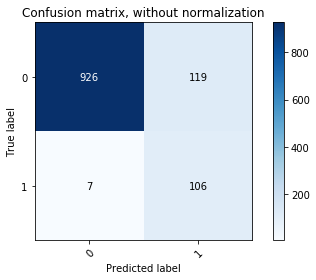

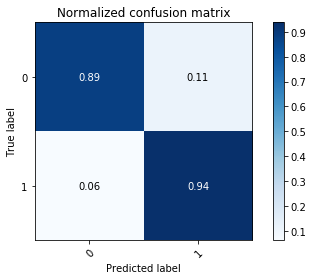

In [12]:
np.set_printoptions(precision=2)
class_names = [0, 1]#y_test.target_names
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test2, predicted2, classes=unique_labels(y_test2, predicted2), title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test2, predicted2, classes=unique_labels(y_test2, predicted2), normalize=True, title='Normalized confusion matrix')

plt.show()

In [14]:
print("Macro")
print("Precision Score",round(metrics.precision_score(y_test, predicted.round(),average='macro'), ndigits=5))
print("Recall Score",round(metrics.recall_score(y_test, predicted.round(),average='macro'), ndigits=5))
print("F1 Score",round(metrics.f1_score(y_test, predicted.round(),average='macro'), ndigits=5))
print("F1 Score",round(metrics.f1_score(y_test, predicted.round(),average='micro'), ndigits=5))


Macro
Precision Score 0.7318
Recall Score 0.91209
F1 Score 0.78176
F1 Score 0.89119
